In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the Data Set
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#checking the Structure of Data
df.shape

(25, 2)

In [4]:
# Checcking the entire info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
from scipy import stats

In [6]:
#Determining the normality of data
print("Skewness of Hours",stats.skew(df["Hours"]))
print("Skewness of Scores",stats.skew(df["Scores"]))
print("Kurtosis of Hours",stats.skew(df["Hours"]))
print("Kurtosis of Hours",stats.skew(df["Scores"]))

Skewness of Hours 0.1787220638918746
Skewness of Scores 0.21968605283072445
Kurtosis of Hours 0.1787220638918746
Kurtosis of Hours 0.21968605283072445


In [7]:
#Co-relation between dependent, independent variables
print("Spearman Co-relation:",stats.stats.spearmanr(df["Hours"],df["Scores"]))
print("Pearson Co-relation:",stats.stats.pearsonr(df["Hours"],df["Scores"]))

Spearman Co-relation: SpearmanrResult(correlation=0.9718907151012602, pvalue=6.034634315166879e-16)
Pearson Co-relation: (0.9761906560220884, 9.132624467460325e-17)


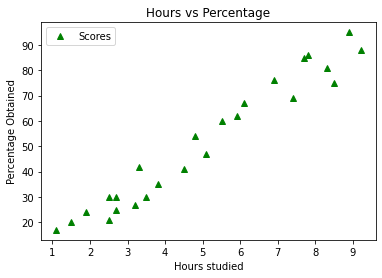

In [8]:
#ploting the distribution of data
df.plot(x='Hours',y='Scores',style= "^",color="green")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Obtained")
plt.legend()
plt.show()

From the visualization , we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the Data for Model evaluation

In [9]:
# Creating Attributes(inputs) & labels(outputs)
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [10]:
# For model Evaluation : We need to Split the data into Training & testing
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                            test_size=0.3, random_state=0) 

# Model Creation

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#creating Liner Regression model & fiting the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
#Equation coefficent and intercept
print ('the estimated intercept %.2f '%model.intercept_)
print ('the coefficient is %d ' %len(model.coef_))

the estimated intercept 2.37 
the coefficient is 1 


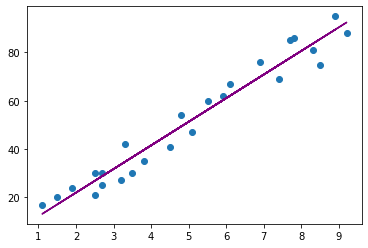

In [14]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color="purple")
plt.show()

# Making predictions of model 

In [15]:
# Comparing Actual vs Predicted
y_pred = model.predict(X_test) 
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
test_df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# Model Evaluation:

This Step is to check the performance of the algorithm, We use here Mean absolute error

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


# Testing your own input:

In [17]:
hrs = [9.25]
score_pred = model.predict([hrs])
print("Predicted Score of Studing 9.25 Hours = {}".format(score_pred[0]))

Predicted Score of Studing 9.25 Hours = 92.91505723477056
